# Matplotlib Object-Oriented API

Matplotlib is a library to create data visualizations in python. Apart from common plots like line plots, bar plots and scatter plots, we can create advanced visualizations like box plots, violin plots, density plots, etc., using Matplotlib.

There are two interfaces in Matplotlib to perform visualizations. We can perform visualizations in Matplotlib using one of the two interfaces.
1. The first one uses a state-based interface, matplotlib.pyplot, and is based on MATLAB. Pyplot is mainly used to design simple and interactive plots.
2. The second one is an object oriented interface. It is recommended to use the object-oriented approach because it gives a better control and customization of the plots.

The object oriented approach:

Instances of Figure and Axes are used in this approach. Figure is a top most layer of all the plot elements. It constitutes the subplots, titles, subtitles, sub axis, legends,etc. Axes is a part of the figure. It is like a subplot. The axes constitutes figure elements like  Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system. There can be many axes in one figure.
Here are the links to documentation of these classes.

https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes

https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure

In [1]:
%matplotlib notebook
%matplotlib inline

We are going to import data from a csv file and create a visualisation on that data using the object oriented approach. First, we read the file and display the top five rows. Next, we create a figure object, and add a sub plot to it. Then, we plot the "gender" column from the above data on the axes created. We can see that there are some non binary and null values in the data. It is easy to visualise these types of data because of matplotlib.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("HackerRank-Developer-Survey-2018-Values.csv")
data.head(5)

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap


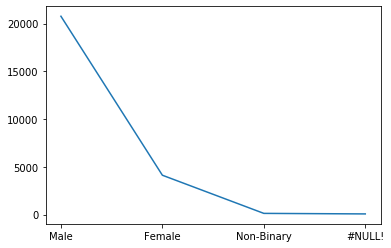

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(data['q3Gender'].value_counts())

We can modify properties of these plots. Here is the reference to documentation.

https://matplotlib.org/tutorials/introductory/lifecycle.html

We can use this object oriented approach to create interactive visualisations which update the visualisations in real time. In the following example, we read a csv file and create a 3D plot. The plot updates itself with the values in the file every one second.

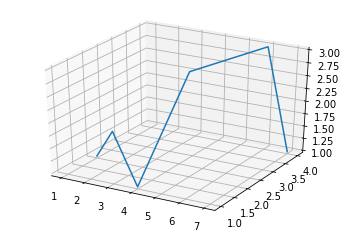

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

def updatingPlot(i):
    xs = []
    ys = []
    zs = []
    for line in open('TestData.csv','r').read().split('\n'):
        if len(line) > 1:
            x, y, z = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
            zs.append(float(z))
    ax.clear()
    ax.plot(xs, ys, zs)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig, updatingPlot, interval=1000)
plt.show()

Using similar approach, we can update the graphs from the data of a database. Here, we are using sqlite database. We are adding random coordinates into the database table. The plot will update when new rows are inserted into the database or when a row is deleted from the database.

(3.0, 2.0)
(6.0, 1.0)
(0.0, 7.0)
(2.0, 8.0)
(1.0, 4.0)
(1.0, 1.0)
(9.0, 1.0)
(2.0, 3.0)


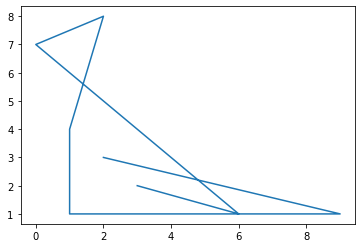

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sqlite3
import random
import time

con = sqlite3.connect('testDB.db')

def create():
    c = con.cursor()
    c.execute("CREATE TABLE IF NOT EXISTS coordinates(x REAL, y REAL)")
    c.close
    
def insert():
    c = con.cursor()
    x = random.randrange(0,10)
    y = random.randrange(0,10)
    c.execute("INSERT INTO coordinates (x, y) VALUES (?, ?)", (x, y))
    c.close
    con.commit()
    time.sleep(1)
    
def read():
    c = con.cursor()
    c.execute('SELECT * FROM coordinates')
    c.close
    data = c.fetchall()
    for row in data:
        print(row)
        
def updatingPlot(i):
    c = con.cursor()
    c.execute('SELECT * FROM coordinates')
    c.close
    data = c.fetchall()
    xs = []
    ys = []
    for row in data:
        xs.append(row[0])
        ys.append(row[1])
    ax.clear()
    ax.plot(xs,ys)
    
create()
insert()
read()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ani = animation.FuncAnimation(fig, updatingPlot, interval=1000)
plt.show()
con.close()

For inserting into the database:

In [5]:
con = sqlite3.connect('testDB.db')
c = con.cursor()
insert()
read()
c.close
con.close()

(3.0, 2.0)
(6.0, 1.0)
(0.0, 7.0)
(2.0, 8.0)
(1.0, 4.0)
(1.0, 1.0)
(9.0, 1.0)
(2.0, 3.0)
(9.0, 3.0)
